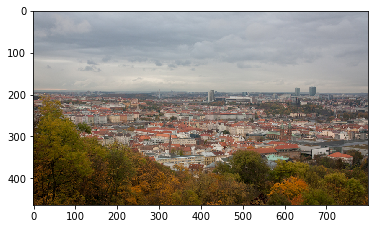

In [1]:
%matplotlib inline
import kornia
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('img/prague.png')
timg = kornia.utils.image_to_tensor(np.array(img)).float() / 255.
plt.imshow(kornia.utils.tensor_to_image(timg[0]))


In [2]:
#Lets read pre-detected features in Oxford affine ellipse [x y a b c] format
ells = torch.from_numpy(np.loadtxt('img/prague.hesaffnet', skiprows=2)).float()
print (ells.shape)
print(ells[0])

torch.Size([2000, 5])
tensor([ 4.4487e+02,  3.2709e+02,  7.1538e-04, -6.9498e-05,  1.0999e-03])


In [3]:
#Now, lets convert ellipses into kornia LAF format:
laf = kornia.feature.ellipse_to_laf(ells.unsqueeze(0))

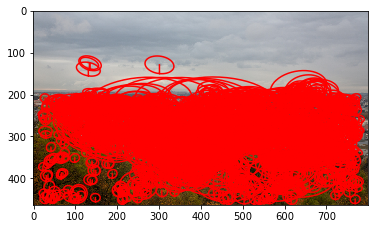

In [4]:
def visualize_LAF(img, LAF, img_idx = 0):
    x, y = kornia.feature.laf.get_laf_pts_to_draw(LAF, img_idx)
    plt.figure()
    plt.imshow(kornia.utils.tensor_to_image(img[img_idx]))
    plt.plot(x, y, 'r')
    plt.show()
    return
visualize_LAF(timg,laf)

In [5]:

#Now, lets extract some patches
patches_aliased = kornia.feature.extract_patches_simple(timg,
                                                        kornia.feature.normalize_laf(laf,timg))
patches_nice =  kornia.feature.extract_patches_from_pyramid(timg, 
                                                            kornia.feature.normalize_laf(laf,timg))
print (patches_nice.shape)

torch.Size([1, 2000, 3, 32, 32])


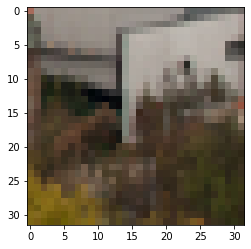

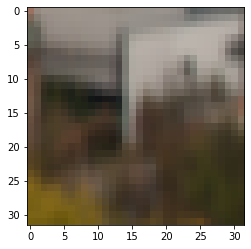

In [6]:
idx = 102
pim = kornia.utils.tensor_to_image(patches_aliased[0,idx:idx+1])
plt.imshow(pim)
pimp = kornia.utils.tensor_to_image(patches_nice[0,idx:idx+1])
plt.figure()
plt.imshow(pimp)


In [7]:
#Now descriptor
descriptor = kornia.SIFTDescriptor(32)
descs = descriptor(kornia.rgb_to_grayscale(patches_nice[0]))
print (descs.shape)
print (descs[0])

torch.Size([2000, 128])
tensor([0.0259, 0.0937, 0.0711, 0.0760, 0.0541, 0.0933, 0.0920, 0.0923, 0.0532,
        0.0998, 0.0765, 0.0861, 0.0138, 0.0767, 0.0763, 0.0361, 0.0362, 0.0761,
        0.0609, 0.0360, 0.0687, 0.1401, 0.0891, 0.0789, 0.1057, 0.1161, 0.0797,
        0.0981, 0.0452, 0.1023, 0.1132, 0.0401, 0.1203, 0.0622, 0.0648, 0.0495,
        0.0720, 0.1553, 0.0989, 0.0774, 0.1441, 0.0856, 0.0725, 0.0851, 0.0792,
        0.1107, 0.1529, 0.0408, 0.0508, 0.0437, 0.0525, 0.0406, 0.0354, 0.0691,
        0.1553, 0.0688, 0.0901, 0.0929, 0.1040, 0.0720, 0.0589, 0.1485, 0.0977,
        0.0646, 0.0559, 0.0594, 0.0703, 0.0607, 0.0336, 0.0190, 0.1071, 0.1018,
        0.0327, 0.0767, 0.1362, 0.0830, 0.0534, 0.0972, 0.0783, 0.0951, 0.0646,
        0.0775, 0.0975, 0.0566, 0.0629, 0.0690, 0.0983, 0.0526, 0.0328, 0.1032,
        0.1318, 0.1473, 0.0996, 0.0936, 0.0882, 0.1427, 0.0555, 0.0712, 0.0933,
        0.0651, 0.1370, 0.1381, 0.0860, 0.0705, 0.0289, 0.1553, 0.1553, 0.0894,
        0.1423, 